<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/05_transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jan 23 19:14:37 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvidia-smi

Thu Jan 23 19:14:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!wget https://raw.githubusercontent.com/divyalaldinani/Deep-Learning-in-TensorFlow/refs/heads/main/extras/helper_functions.py

--2025-01-23 19:17:04--  https://raw.githubusercontent.com/divyalaldinani/Deep-Learning-in-TensorFlow/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4090 (4.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.99K  --.-KB/s    in 0s      

2025-01-23 19:17:04 (34.9 MB/s) - ‘helper_functions.py’ saved [4090/4090]



In [38]:
from helper_functions import pred_and_plot, plot_loss_curves, unzip_folder, walk_through_directory, view_random_image, view_random_image_and_augmented, create_tensorboard_callback1

### Downloading the dataset

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_folder("10_food_classes_10_percent.zip")

--2025-01-23 19:17:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  40.1MB/s    in 4.7s    

2025-01-23 19:17:15 (34.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [8]:
walk_through_directory('/content/10_food_classes_10_percent')

2 directories and 0 files in /content/10_food_classes_10_percent
10 directories and 0 files in /content/10_food_classes_10_percent/test
0 directories and 250 files in /content/10_food_classes_10_percent/test/hamburger
0 directories and 250 files in /content/10_food_classes_10_percent/test/ice_cream
0 directories and 250 files in /content/10_food_classes_10_percent/test/ramen
0 directories and 250 files in /content/10_food_classes_10_percent/test/steak
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_curry
0 directories and 250 files in /content/10_food_classes_10_percent/test/pizza
0 directories and 250 files in /content/10_food_classes_10_percent/test/grilled_salmon
0 directories and 250 files in /content/10_food_classes_10_percent/test/fried_rice
0 directories and 250 files in /content/10_food_classes_10_percent/test/sushi
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_wings
10 directories and 0 files in /content/10_food

In [9]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

#### Input Data Pipelines
**using tf.keras.preprocessing.image_dataset_from_directory() -> creates tf.data.Dataset object, explore [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)**

In [10]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE= 32
IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         batch_size=BATCH_SIZE,
                                                                         image_size=IMAGE_SIZE,
                                                                         shuffle=True,
                                                                         label_mode='categorical' # one hot encoded
                                                                         )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             batch_size=BATCH_SIZE,
                                                             image_size = IMAGE_SIZE,
                                                             shuffle=True,
                                                             label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [12]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [13]:
# see a batch of Data

for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[1.54117340e+02 1.56658157e+02 1.63658157e+02]
   [1.53831635e+02 1.51239792e+02 1.52525513e+02]
   [1.53214279e+02 1.43770416e+02 1.37352036e+02]
   ...
   [1.71586731e+02 1.44428589e+02 4.45051155e+01]
   [1.70591843e+02 1.45948990e+02 4.66632690e+01]
   [1.71479599e+02 1.46836731e+02 4.75510254e+01]]

  [[1.51882660e+02 1.58336731e+02 1.68979584e+02]
   [1.52500000e+02 1.53566330e+02 1.57770416e+02]
   [1.50331635e+02 1.44076523e+02 1.41229599e+02]
   ...
   [1.70097015e+02 1.37382721e+02 3.25970078e+01]
   [1.66780563e+02 1.35933624e+02 3.00815544e+01]
   [1.63091873e+02 1.32377579e+02 2.45918655e+01]]

  [[1.82489792e+02 1.92362244e+02 2.05357147e+02]
   [1.69061218e+02 1.73943878e+02 1.83285706e+02]
   [1.48530609e+02 1.47933670e+02 1.49719391e+02]
   ...
   [1.69923569e+02 1.31923523e+02 2.24184265e+01]
   [1.67882599e+02 1.30397934e+02 1.62397346e+01]
   [1.61413177e+02 1.24698959e+02 8.98974514e+00]]

  ...

  [[1.37056183e+02 1.12270454e+02 2.22704525e+01]
   [1

### Creating model with `tf.keras.applications`

In [14]:
# from tf.keras.applications import MobileV3Small

base_model = tf.keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=IMAGE_SIZE+(3,),
    include_top=False,
    include_preprocessing = True
)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = 'input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) #returns (batch_size, channels)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x) # trains on batch_size requires (batch_size, features)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(x = train_data_10_percent,
                        validation_data=test_data,
                        epochs=5)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 802ms/step - accuracy: 0.1910 - loss: 2.4789 - val_accuracy: 0.3172 - val_loss: 1.8983
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.4427 - loss: 1.7180 - val_accuracy: 0.5444 - val_loss: 1.4565
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 498ms/step - accuracy: 0.6256 - loss: 1.3167 - val_accuracy: 0.6564 - val_loss: 1.1908
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.7403 - loss: 1.0394 - val_accuracy: 0.6932 - val_loss: 1.0551
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 496ms/step - accuracy: 0.7595 - loss: 0.9030 - val_accuracy: 0.7364 - val_loss: 0.9480


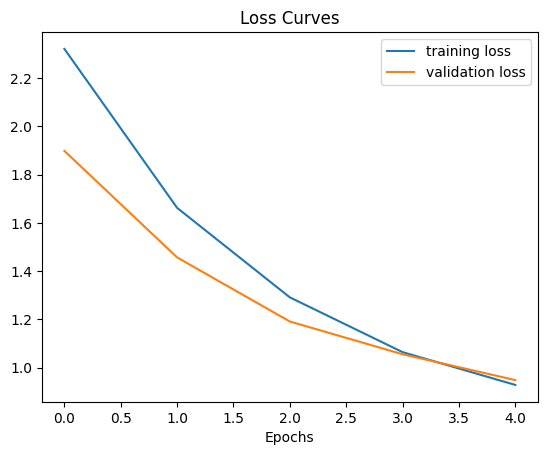

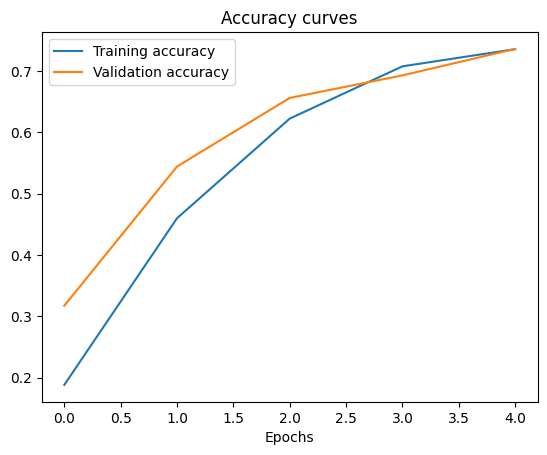

In [15]:
plot_loss_curves(history_0)

In [16]:
# checking out layers in model

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer
1 rescaling
2 conv
3 conv_bn
4 activation
5 expanded_conv_depthwise_pad
6 expanded_conv_depthwise
7 expanded_conv_depthwise_bn
8 re_lu
9 expanded_conv_squeeze_excite_avg_pool
10 expanded_conv_squeeze_excite_conv
11 expanded_conv_squeeze_excite_relu
12 expanded_conv_squeeze_excite_conv_1
13 re_lu_1
14 expanded_conv_squeeze_excite_mul
15 expanded_conv_project
16 expanded_conv_project_bn
17 expanded_conv_1_expand
18 expanded_conv_1_expand_bn
19 re_lu_2
20 expanded_conv_1_depthwise_pad
21 expanded_conv_1_depthwise
22 expanded_conv_1_depthwise_bn
23 re_lu_3
24 expanded_conv_1_project
25 expanded_conv_1_project_bn
26 expanded_conv_2_expand
27 expanded_conv_2_expand_bn
28 re_lu_4
29 expanded_conv_2_depthwise
30 expanded_conv_2_depthwise_bn
31 re_lu_5
32 expanded_conv_2_project
33 expanded_conv_2_project_bn
34 expanded_conv_2_add
35 expanded_conv_3_expand
36 expanded_conv_3_expand_bn
37 activation_1
38 expanded_conv_3_depthwise_pad
39 expanded_conv_3_depthwise
40 expanded_conv_3_

In [17]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name)

0 input_layer
1 MobileNetV3Small
2 global_average_pooling_layer
3 output_layer


In [18]:
base_model.summary() #trained mobile net whose layers are frozen

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [19]:
model_0.summary() # only weights, baises in last layer can be modified

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

In [36]:
results_0 = model_0.evaluate(test_data)
results_0

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7346 - loss: 0.9381


[0.9479799866676331, 0.7364000082015991]

### Training other models

In [20]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_folder('10_food_classes_1_percent.zip')

--2025-01-23 19:19:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  36.5MB/s    in 4.0s    

2025-01-23 19:19:14 (32.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
train_dir_1_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_1_percent/test'


In [22]:
walk_through_directory('10_food_classes_1_percent')

2 directories and 0 files in 10_food_classes_1_percent
10 directories and 0 files in 10_food_classes_1_percent/test
0 directories and 250 files in 10_food_classes_1_percent/test/hamburger
0 directories and 250 files in 10_food_classes_1_percent/test/ice_cream
0 directories and 250 files in 10_food_classes_1_percent/test/ramen
0 directories and 250 files in 10_food_classes_1_percent/test/steak
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_curry
0 directories and 250 files in 10_food_classes_1_percent/test/pizza
0 directories and 250 files in 10_food_classes_1_percent/test/grilled_salmon
0 directories and 250 files in 10_food_classes_1_percent/test/fried_rice
0 directories and 250 files in 10_food_classes_1_percent/test/sushi
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_wings
10 directories and 0 files in 10_food_classes_1_percent/train
0 directories and 7 files in 10_food_classes_1_percent/train/hamburger
0 directories and 7 files in 10_f

In [23]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,

                                                                           label_mode ='categorical',
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE,
                                                                image_size=IMAGE_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
### Adding data augmentaion directly into the model
from tensorflow.keras import layers

# generates 1 augmented Image per input image
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Resize to specific dimensions
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
], name= 'data_augmentationn')

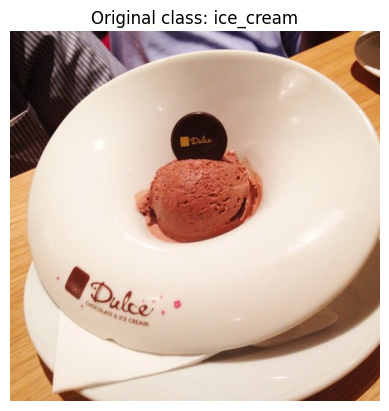

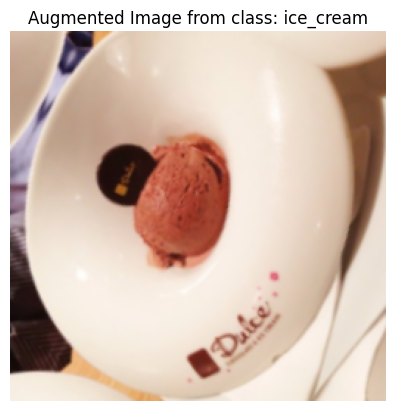

In [30]:
view_random_image_and_augmented(train_data_1_percent.class_names, train_dir_1_percent, data_augmentation)

In [28]:
print(augmented_image)

tf.Tensor(
[[[ 98  94  83]
  [100  96  85]
  [101  97  86]
  ...
  [124 124 124]
  [124 124 122]
  [122 122 121]]

 [[ 97  93  82]
  [ 99  95  84]
  [101  97  86]
  ...
  [123 123 122]
  [122 122 120]
  [119 119 117]]

 [[ 96  90  81]
  [ 99  93  83]
  [100  96  84]
  ...
  [122 122 120]
  [119 119 117]
  [116 116 115]]

 ...

 [[144 144 145]
  [142 142 143]
  [142 142 142]
  ...
  [ 85  80  74]
  [ 84  81  74]
  [ 85  83  74]]

 [[143 143 145]
  [142 142 142]
  [141 141 142]
  ...
  [ 83  78  72]
  [ 83  78  72]
  [ 84  80  73]]

 [[143 143 145]
  [142 142 143]
  [142 142 142]
  ...
  [ 81  77  72]
  [ 82  78  72]
  [ 85  81  74]]], shape=(220, 223, 3), dtype=uint8)


### Model 1: Feature extraction using transfer learning on 1% of data + data augmentation

In [39]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV3Small(include_top=False)#normalizes the image values

base_model.trainable=False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B
] ,name="data_augmentation" )



inputs = layers.Input(shape=input_shape, name='input_layer')

# adds in data augmentation as a layer
x = data_augmentation(inputs)
print(f"Shape of x is: {x.shape}")
# inputs after data augmentation, and freeze base model weights
x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name='global_average_poooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x) # 10 -> 10 categories in our data

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        validation_data=test_data,
                        callbacks = [create_tensorboard_callback1("transfer_learning-2", 'model_1')])


/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Shape of x is: (None, None, None, 3)
Saving TensorBoard log files to : transfer_learning-2/model_1/20250123-194031
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 528ms/step - accuracy: 0.1569 - loss: 2.4571 - val_accuracy: 0.2256 - val_loss: 2.0444
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 397ms/step - accuracy: 0.3025 - loss: 1.9977 - val_accuracy: 0.4992 - val_loss: 1.5867
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.4924 - loss: 1.6107 - val_accuracy: 0.6232 - val_loss: 1.3162
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 379ms/step - accuracy: 0.5452 - loss: 1.4378 - val_accuracy: 0.6792 - val_loss: 1.1623
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.6162 - loss: 1.2810 - val_accuracy: 0.7080 - val_loss: 1.0497


In [40]:
inputs

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>

In [41]:
model_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_poooling_layer        │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

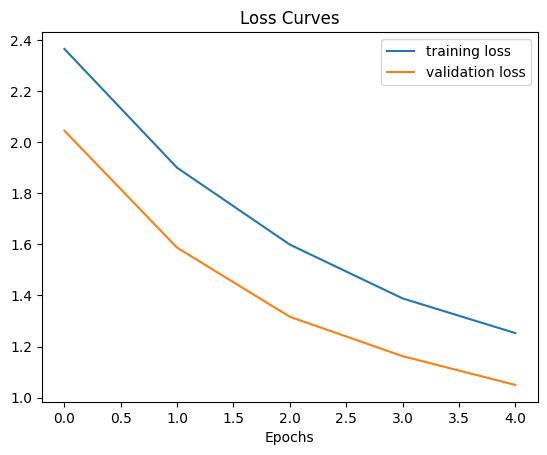

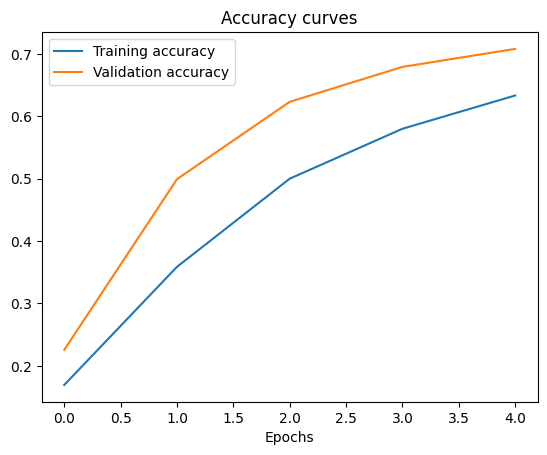

In [42]:
plot_loss_curves(history_1)

In [43]:
results_1 = model_1.evaluate(test_data)
results_1

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7046 - loss: 1.0431


[1.049668788909912, 0.7080000042915344]

### Model 3: Fine-Tuning an existing model(Mobile net) on 10% of training data

In [44]:
# create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


input_shape = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV3Small(include_top = False) # remove output layers as org model has diff number of output categories
base_model.trainable = False
data_aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = "data_augmentation")


inputs = layers.Input(shape=input_shape, name = 'input_layer')
x = data_aug(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_pooling')(x)
outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)


model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [184]:
# to use this code again we will put it in a afunction
def create_base_model(training=False, lr=0.001, input_shape=(224, 224, 3)) -> tf.keras.Model:
    # input_shape = (224, 224, 3)

    base_model = tf.keras.applications.MobileNetV3Small(include_top = False) # remove output layers as org model has diff number of output categories
    base_model.trainable = training
    data_aug = tf.keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2)
    ], name = "data_augmentation")


    inputs = layers.Input(shape=input_shape, name = 'input_layer')
    x = data_aug(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name='global_pooling')(x)
    outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)
    model = tf.keras.Model(inputs, outputs)


    model.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    return model

model_2 = create_base_model()

### Creating a Model Checkpoint callback

the ModelCheckpoint callback allows us to save the model in 'SavedModel' format.
This allows you to save the model trained previously.

In [185]:
checkpoint_path = 'model_2_checkpoints_weights/ckpt/checkpoint.weights.h5'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True, #save the best model
                                                         save_freq='epoch',
                                                         verbose=1
                                                         )

In [186]:
model_2

<Functional name=functional_15, built=True>

In [187]:
initial_epochs = 5

history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data = test_data,
                        callbacks=[create_tensorboard_callback1('transfer-learning-2', 'model_2'), checkpoint_callback])

Saving TensorBoard log files to : transfer-learning-2/model_2/20250123-211744
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0783 - loss: 2.7633
Epoch 1: val_loss improved from inf to 2.06837, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.0797 - loss: 2.7550 - val_accuracy: 0.2684 - val_loss: 2.0684
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2631 - loss: 2.0650
Epoch 2: val_loss improved from 2.06837 to 1.63462, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.2640 - loss: 2.0629 - val_accuracy: 0.4612 - val_loss: 1.6346
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4525 - loss: 1.7023
Epoch 3: val_loss improved from 1.63462 to 1.38738, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.4528 - loss: 1

In [188]:
results_2 = model_2.evaluate(test_data)
results_2

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6623 - loss: 1.0948


[1.1031668186187744, 0.6675999760627747]

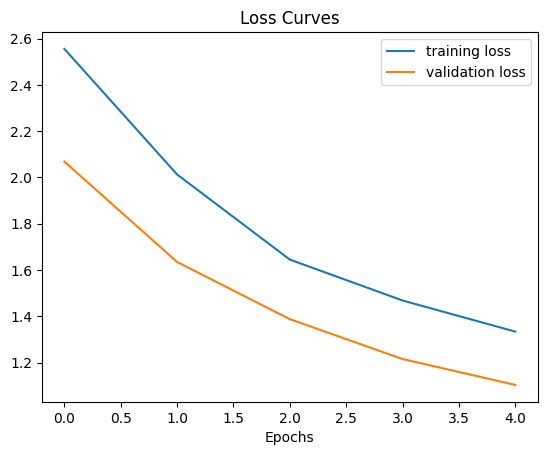

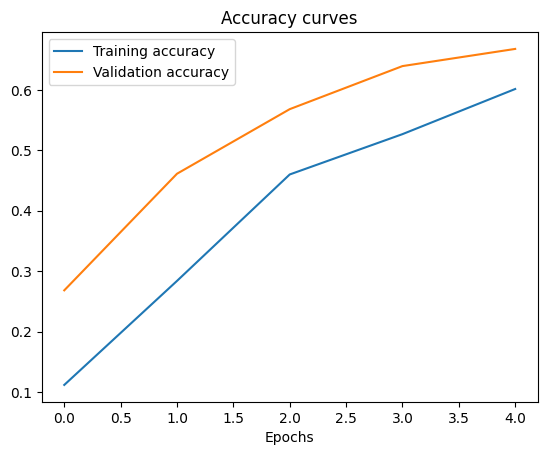

In [189]:
plot_loss_curves(history_2)


#### making use of ModelCheckpoint that saved the model's weights only && **why it CAN BE different from model 2?**

In [190]:
model_2.load_weights(checkpoint_path) # stores the best model version of model 2(while training), thats what we saved, right?
loaded_weights_model_2_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.6589 - loss: 1.1045


In [191]:
loaded_weights_model_2_results == results_2  # due to precision of weights stored, there can be variations

False

In [192]:
import numpy as np
np.isclose(np.array(results_2), np.array(loaded_weights_model_2_results))


array([ True,  True])

### Model 3: Fine-Tuning an existing model on 10% of data without data augmnetation

In [193]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=MobileNetV3Small, built=True>,
 <GlobalAveragePooling2D name=global_pooling, built=True>,
 <Dense name=output_layer, built=True>]

In [194]:
for layer_num, layer in enumerate(model_2.layers):
    print(f"Layer number: {layer_num} | Layer name: {layer.name} | Layer type: {layer} | Trainable: {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <InputLayer name=input_layer, built=True> | Trainable: True
Layer number: 1 | Layer name: data_augmentation | Layer type: <Sequential name=data_augmentation, built=True> | Trainable: True
Layer number: 2 | Layer name: MobileNetV3Small | Layer type: <Functional name=MobileNetV3Small, built=True> | Trainable: False
Layer number: 3 | Layer name: global_pooling | Layer type: <GlobalAveragePooling2D name=global_pooling, built=True> | Trainable: True
Layer number: 4 | Layer name: output_layer | Layer type: <Dense name=output_layer, built=True> | Trainable: True


In [195]:
model_2.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_pooling                       │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

In [196]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=MobileNetV3Small, built=True>,
 <GlobalAveragePooling2D name=global_pooling, built=True>,
 <Dense name=output_layer, built=True>]

In [197]:
model_2.layers[2]

<Functional name=MobileNetV3Small, built=True>

In [198]:
model_2.layers[2].layers

[<InputLayer name=input_layer_14, built=True>,
 <Rescaling name=rescaling_7, built=True>,
 <Conv2D name=conv, built=True>,
 <BatchNormalization name=conv_bn, built=True>,
 <Activation name=activation_126, built=True>,
 <ZeroPadding2D name=expanded_conv_depthwise_pad, built=True>,
 <DepthwiseConv2D name=expanded_conv_depthwise, built=True>,
 <BatchNormalization name=expanded_conv_depthwise_bn, built=True>,
 <ReLU name=re_lu_98, built=True>,
 <GlobalAveragePooling2D name=expanded_conv_squeeze_excite_avg_pool, built=True>,
 <Conv2D name=expanded_conv_squeeze_excite_conv, built=True>,
 <ReLU name=expanded_conv_squeeze_excite_relu, built=True>,
 <Conv2D name=expanded_conv_squeeze_excite_conv_1, built=True>,
 <ReLU name=re_lu_99, built=True>,
 <Multiply name=expanded_conv_squeeze_excite_mul, built=True>,
 <Conv2D name=expanded_conv_project, built=True>,
 <BatchNormalization name=expanded_conv_project_bn, built=True>,
 <Conv2D name=expanded_conv_1_expand, built=True>,
 <BatchNormalization nam

#### top layers learn generic patterns from data, thus we dont want to train those while fine tuning, we want to change the way in which our model takes in the details and interprets it, for this we should train bottom layer(layers towards the output)

In [199]:
model_2_base_model = model_2.layers[2] # MobileNetV3Small

listt = [1, 2, 3, 4, 5]
for num in listt[-2:]:
  print(num)

4
5


In [200]:
model_2_base_model.trainable = True # train bottom 10 layers
for layer in model_2_base_model.layers[:-10]:
    layer.trainable = False

for layer in model_2_base_model.layers[-10:]:
    layer.trainable = True


model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # to allow gradual learning and not drastic changes
                metrics=['accuracy'])

model_2.load_weights(checkpoint_path)

In [201]:
for layer in model_2.layers[2].layers:
  print(f"{layer.name} {layer.trainable}")

model_2.layers[2].trainable

input_layer_14 False
rescaling_7 False
conv False
conv_bn False
activation_126 False
expanded_conv_depthwise_pad False
expanded_conv_depthwise False
expanded_conv_depthwise_bn False
re_lu_98 False
expanded_conv_squeeze_excite_avg_pool False
expanded_conv_squeeze_excite_conv False
expanded_conv_squeeze_excite_relu False
expanded_conv_squeeze_excite_conv_1 False
re_lu_99 False
expanded_conv_squeeze_excite_mul False
expanded_conv_project False
expanded_conv_project_bn False
expanded_conv_1_expand False
expanded_conv_1_expand_bn False
re_lu_100 False
expanded_conv_1_depthwise_pad False
expanded_conv_1_depthwise False
expanded_conv_1_depthwise_bn False
re_lu_101 False
expanded_conv_1_project False
expanded_conv_1_project_bn False
expanded_conv_2_expand False
expanded_conv_2_expand_bn False
re_lu_102 False
expanded_conv_2_depthwise False
expanded_conv_2_depthwise_bn False
re_lu_103 False
expanded_conv_2_project False
expanded_conv_2_project_bn False
expanded_conv_2_add False
expanded_conv_3_

True

In [202]:
fine_tune_epochs = initial_epochs

history_2_unfreezed = model_2.fit(train_data_10_percent,
                                  validation_data= test_data,
                                  epochs = fine_tune_epochs,
                                  callbacks=[create_tensorboard_callback1('transfer-learning-2', 'model_2-unfreezed')])

Saving TensorBoard log files to : transfer-learning-2/model_2-unfreezed/20250123-211851
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.5319 - loss: 1.4179 - val_accuracy: 0.6640 - val_loss: 1.0959
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.6205 - loss: 1.2164 - val_accuracy: 0.6552 - val_loss: 1.0909
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.6384 - loss: 1.1520 - val_accuracy: 0.6536 - val_loss: 1.0721
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.6787 - loss: 1.0665 - val_accuracy: 0.6644 - val_loss: 1.0397
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.7408 - loss: 0.9684 - val_accuracy: 0.6680 - val_loss: 1.0102
